### Name : Sharvari Raut

##### Task 5 : To Explore Business Analytics

#### **Aim -** To perform 'Exploratory Data Analysis' on the provided dataset 'SampleSuperstore'.

**Problem Statement -** You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data? 

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the dataset
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
# checking the top 5 rows and the columns to understand the data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# To check the shape of the data
df.shape

(9994, 13)

In [5]:
# Getting information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Describe the dataset to know more about it
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Checking if there are any duplicate rows in the dataset
df.duplicated().sum()

17

In [8]:
# Removing duplicated rows to avoid faaults in further calculations
df.drop_duplicates(inplace=True)

In [9]:
# Checking the shape of the dataset again
df.shape

(9977, 13)

### **Visualize between the correlation of the features using Heatmap**

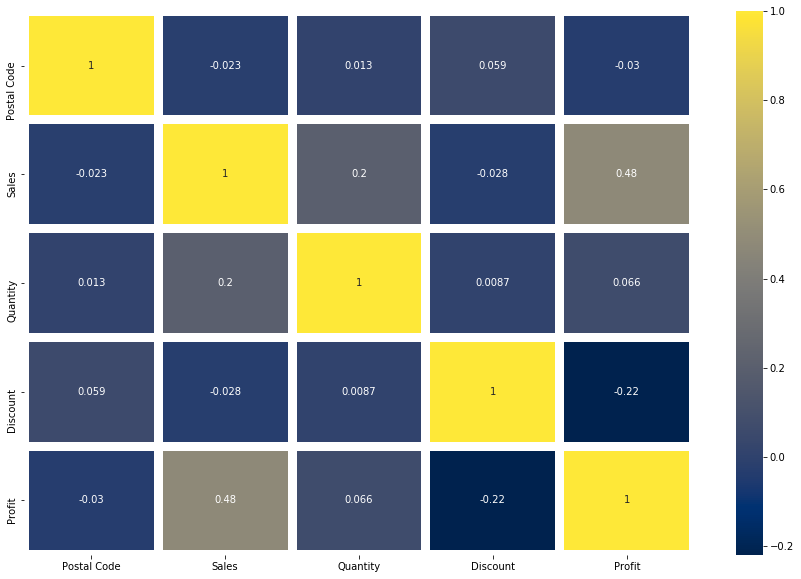

In [54]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="cividis", lw=8, linecolor='white')

### **To observe each and every feature**

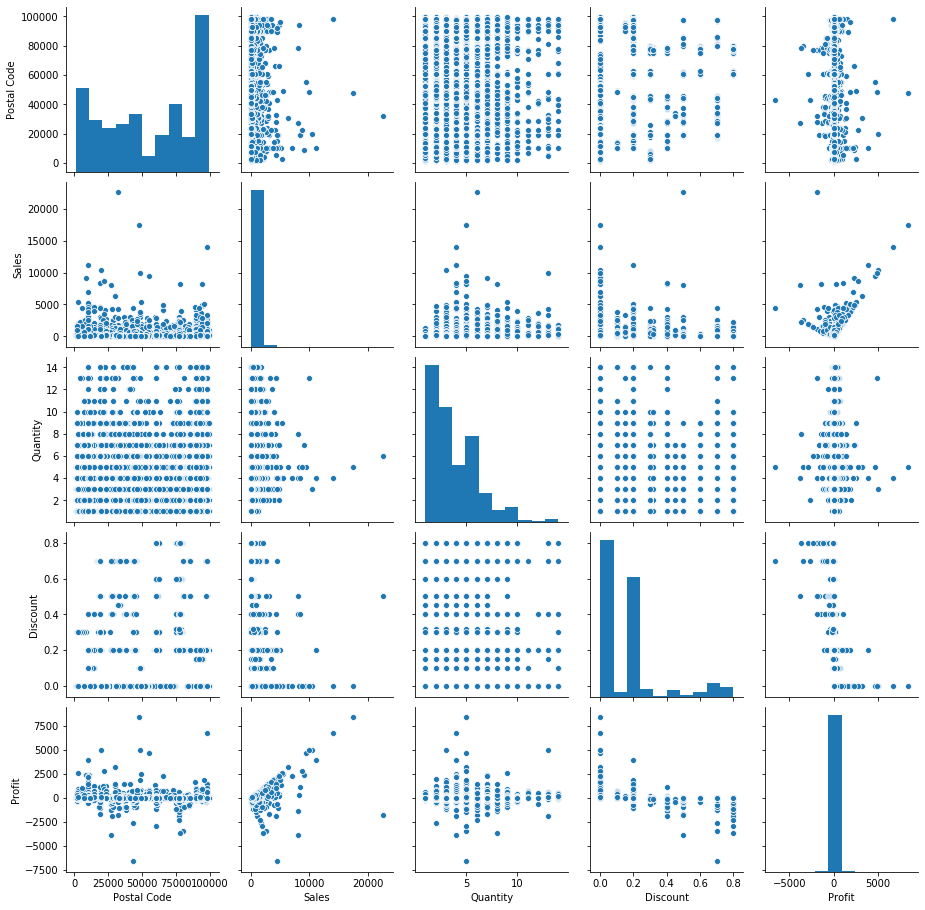

In [34]:
sns.pairplot(df)

#### **Pre-processing Pipeline -**
#### **Checking for Outliers :-** We will use the box-plot feature of the seaborn library to detect the outliers clearly.

In [11]:
ds = df.select_dtypes(include=[np.number])

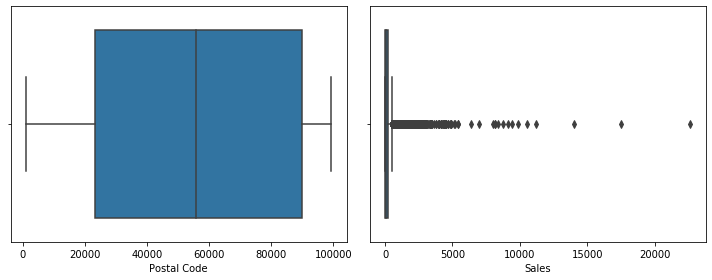

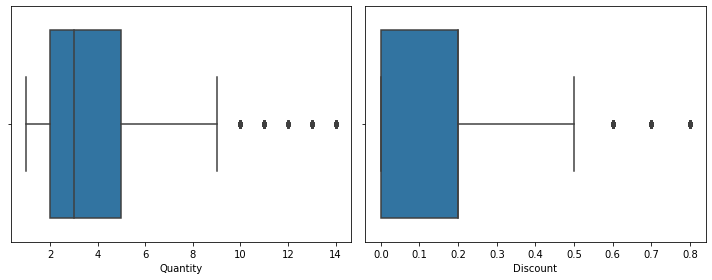

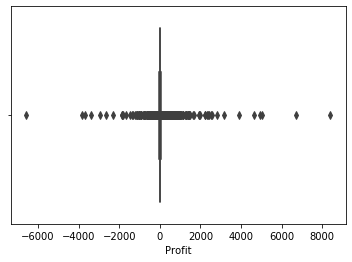

In [12]:
# taking a list of all the features/columns
cols = ds.columns.tolist()

# Box plot of all the features to identify outliers
for col in range(0, len(cols), 2):
  if len(cols) > col + 1:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(ds[cols[col]])
    plt.subplot(122)
    sns.boxplot(ds[cols[col + 1]])
    plt.tight_layout()
    plt.show()
  else:
    sns.boxplot(ds[cols[col]])

#### **Observation -** From the above plot, the outliers in Sales and Profit are clearly seen. As it has a large data set, we can remove those containing outliers to improve our results.

In [13]:
# Removal of Outliers
from scipy.stats.mstats import winsorize #importing the in-built winsorize model from scipy library

# Treating outliers by Winssorization
cols = list(ds)
for col in cols:
  if col in ds.select_dtypes(include=np.number).columns:
    ds[col] = winsorize(ds[col], limits=[0.05,0.1], inclusive=(True,True))

#Checking the data set shape again
ds.shape

C:\Users\Sharvari\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(9977, 5)

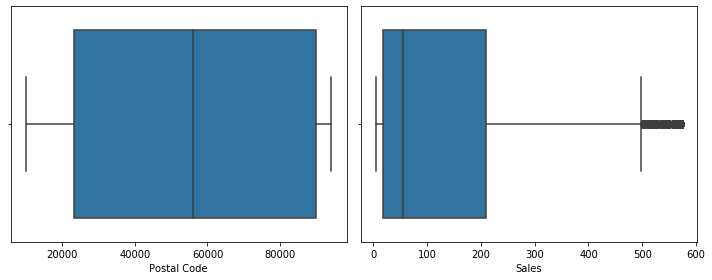

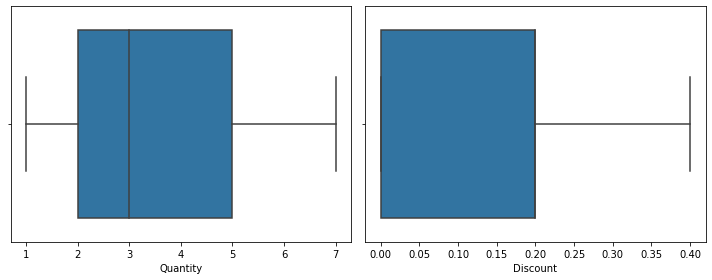

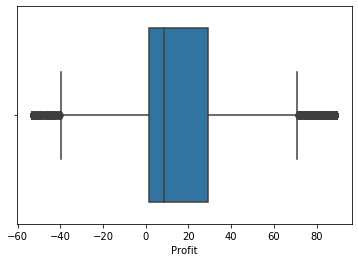

In [14]:
# taking a list of all the features/columns
cols = ds.columns.tolist()

#Boxplot of all features to identify outliners
for col in range(0, len(cols), 2):
  if len(cols) > col + 1:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(ds[cols[col]])
    plt.subplot(122)
    sns.boxplot(ds[cols[col + 1]])
    plt.tight_layout()
    plt.show()
  else:
    sns.boxplot(ds[cols[col]])

**The Winsorise model works pretty well and treated all the outliers with 100% accuracy. As we don't have any outliers and our data set is processed, it is ready for Exploratory Analysis -**

In [15]:
ds.shape

(9977, 5)

In [16]:
ds.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.960,2,0.0,41.9136
1,42420,573.174,3,0.0,89.3142
2,90036,14.620,2,0.0,6.8714
3,33311,573.174,5,0.4,-53.2704
4,33311,22.368,2,0.2,2.5164


In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Postal Code  9977 non-null   int64  
 1   Sales        9977 non-null   float64
 2   Quantity     9977 non-null   int64  
 3   Discount     9977 non-null   float64
 4   Profit       9977 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 467.7 KB


In [18]:
ds.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
mean,55129.312318,148.571288,3.634359,0.128239,17.431262
std,31366.859837,186.521670,1.843141,0.137767,35.070270
min,10009.000000,4.980000,1.000000,0.000000,-53.270400
25%,23223.000000,17.300000,2.000000,0.000000,1.726200
50%,55901.000000,54.816000,3.000000,0.200000,8.671000
75%,90008.000000,209.970000,5.000000,0.200000,29.372000
max,94122.000000,573.174000,7.000000,0.400000,89.314200


#### **Data Visualization**

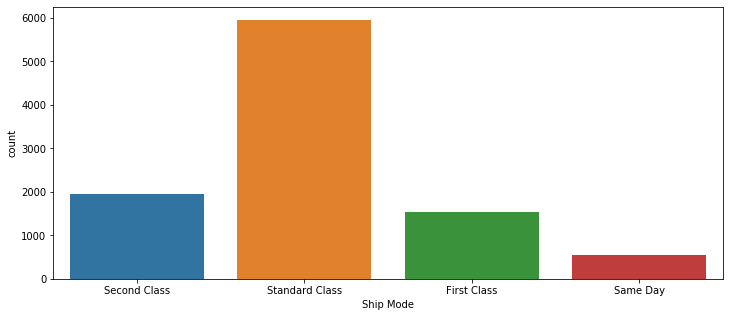

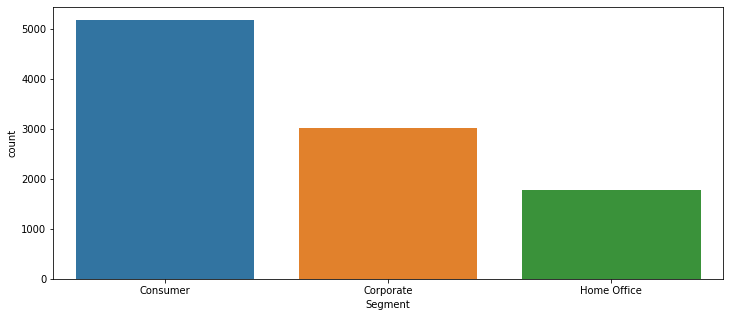

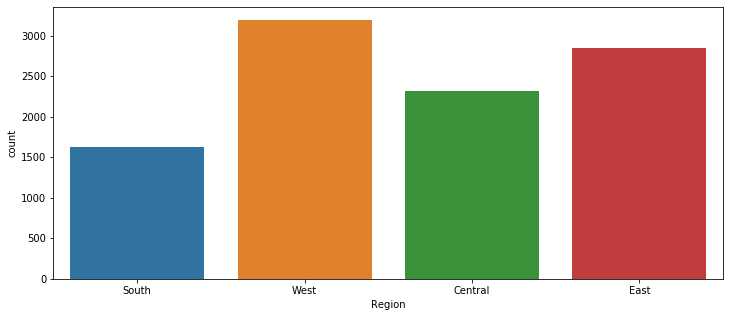

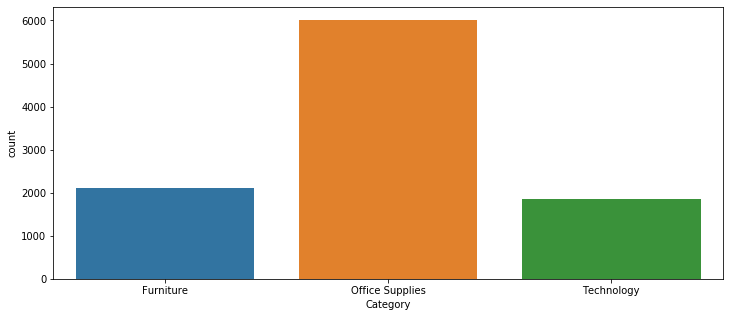

In [21]:
for i in df[['Ship Mode', 'Segment', 'Region', 'Category']]:
  plt.figure(figsize=(12,5))
  sns.countplot(df[i])
  plt.show()

#### **Observations -** 
In the Ship mode, the Standard Class has the highest count which means the customers give the highest priority to this type of shipping mode.

In Segment, the Consumers have the highest count which means that the consumers use most of the shippings.

From the Regions graph, we observe that the West region has the highest customers count.

From the items category, we observe that the Office Supplies Category has the highest sales count.

Text(0, 0.5, 'Frequency')

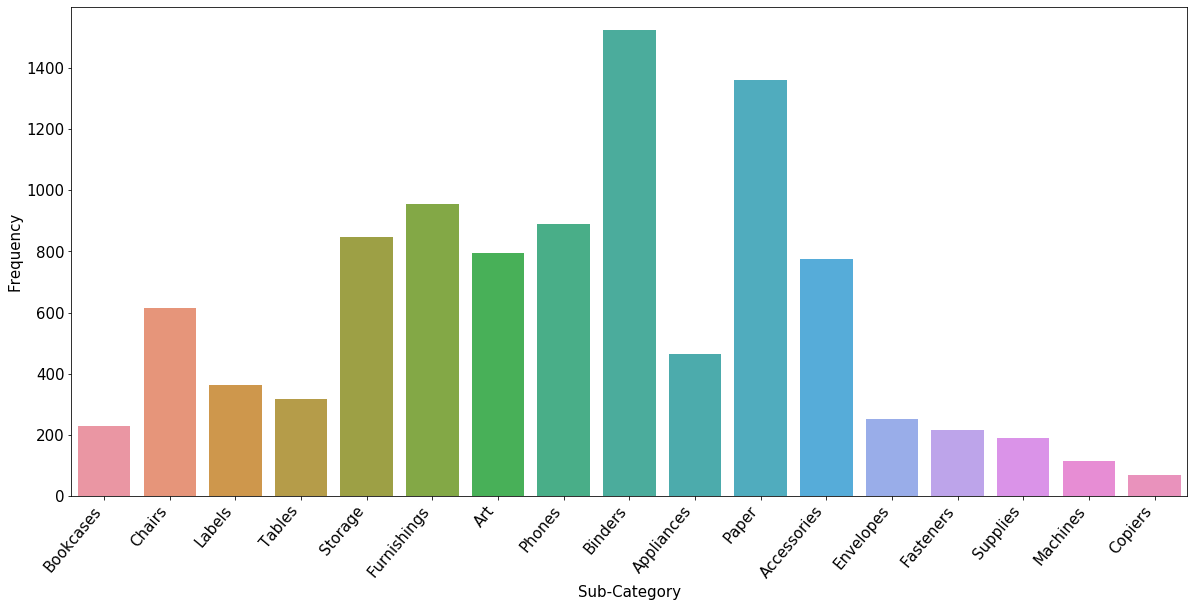

In [22]:
plt.figure(figsize = (20,9))
sns.countplot(df['Sub-Category'])
plt.xticks(rotation=50, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

#### **Observation -** From the above graph, we observe that some of the top sub-categories are Binders, Paper, Furnishings and Phones.

Text(0.5, 6.79999999999999, 'Products')

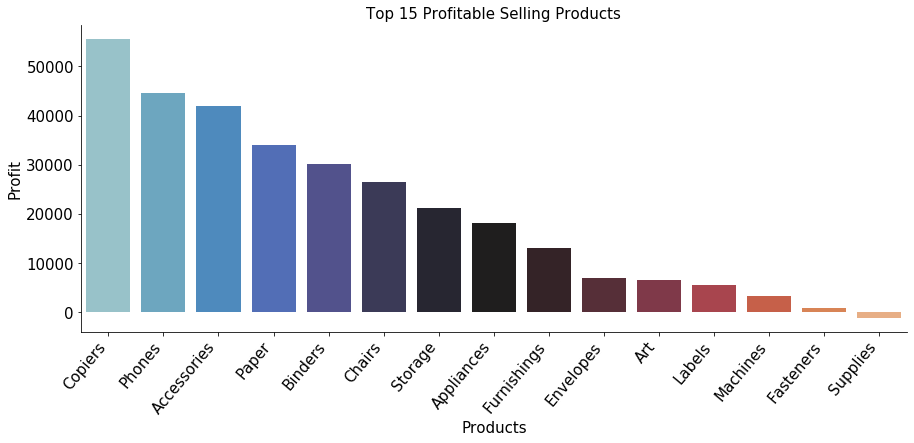

In [23]:
#Top 15 Profittable selling products
top_15 = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
sns.catplot(x = 'Sub-Category', y = 'Profit', data = top_15.head(15), kind = 'bar', aspect = 2.5, palette = 'icefire')
plt.title('Top 15 Profitable Selling Products', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.xlabel('Products', fontsize = 15)

#### **Observations -** 
From the above graph, we observe that some of the top most profitable selling products are Copiers, Phones, Accessories.
We also observe that Machines have the lower count as well as profits, hence it is of least value.
And Copiers gain higher profits despite having least count.

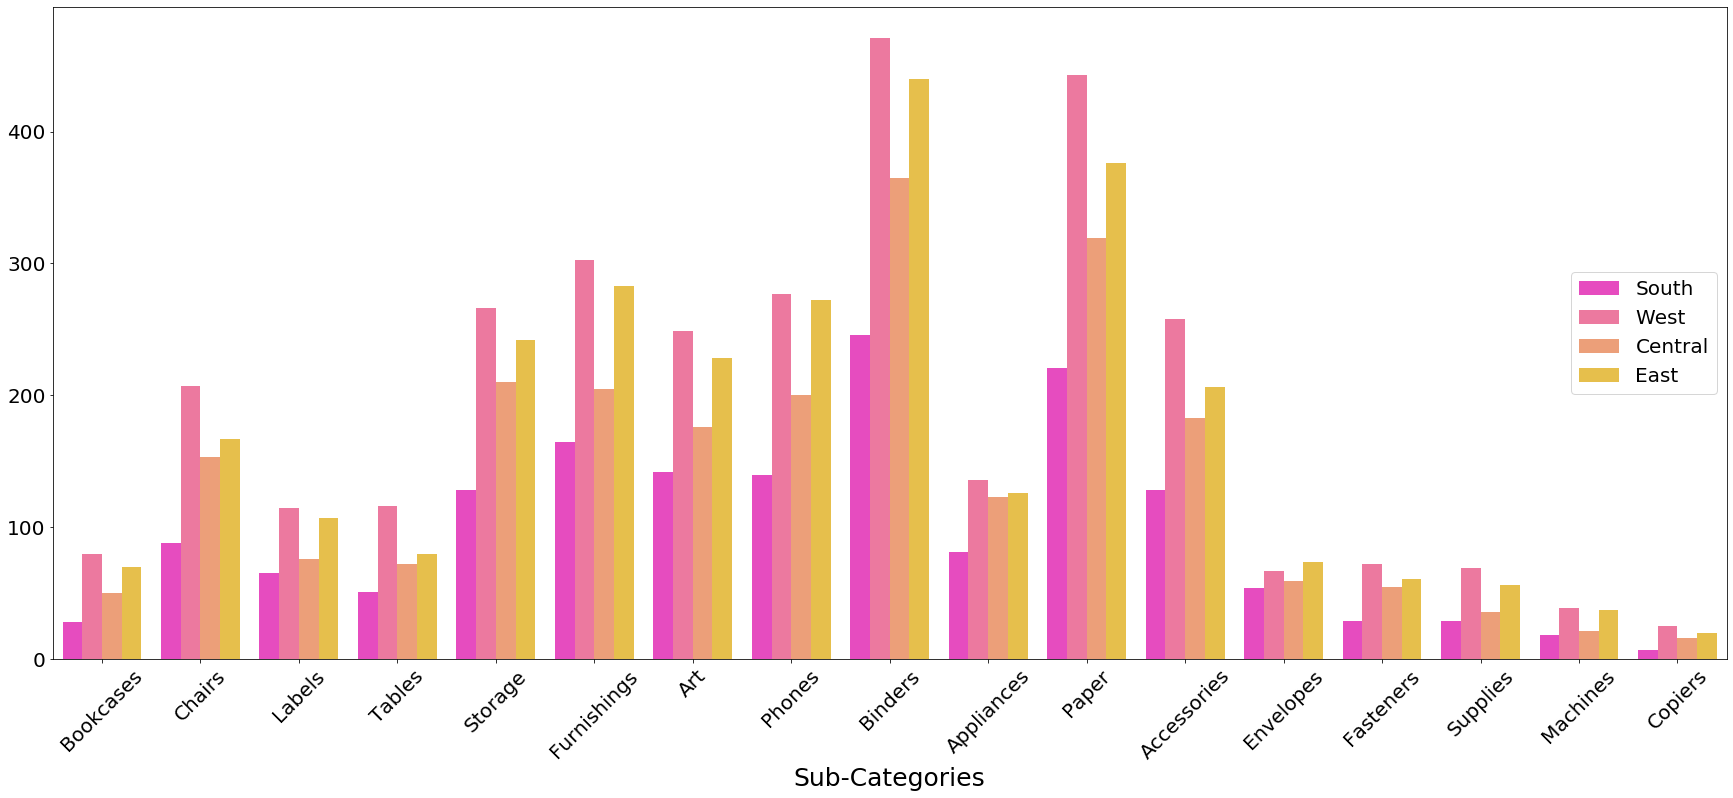

In [39]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = df, palette = 'spring')
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sub-Categories', fontsize = 25) 
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20)

#### **Observations -**
From the above graph, we can see that the top sub-categories according to region are Blinders, Paper, Furnishings.
We also observe that the West region has higher count on an average.

Text(0, 0.5, 'Frequency')

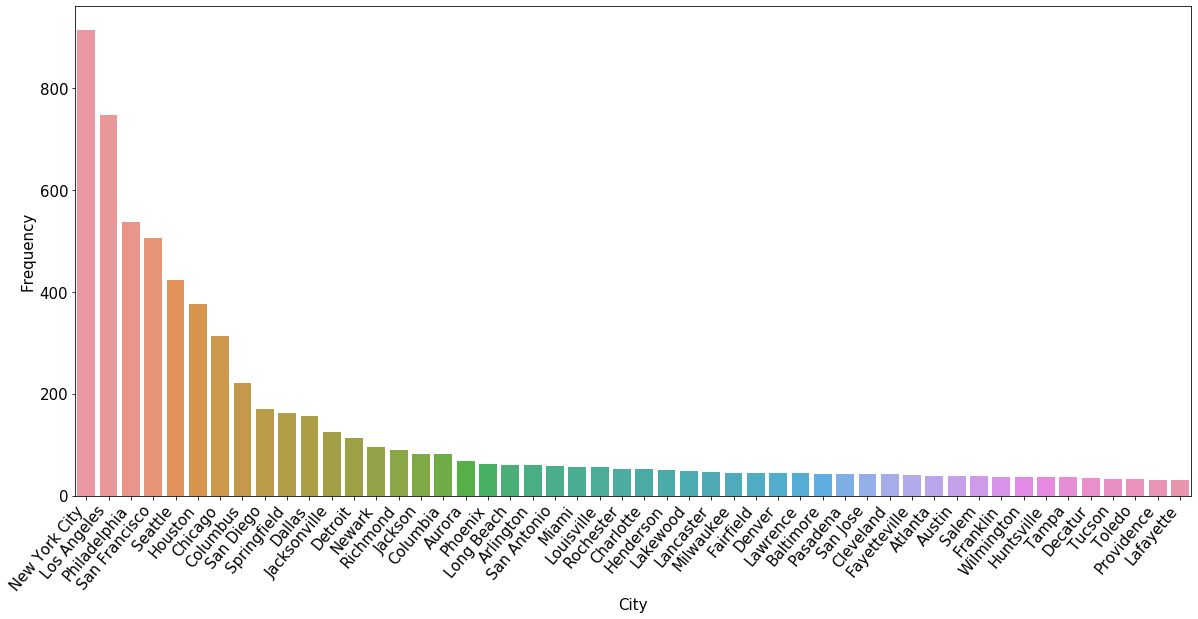

In [25]:
plt.figure(figsize = (20,9))
sns.countplot(x = df['City'], order = (df['City'].value_counts().head(50)).index)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

#### **Observations -**
We observe that the top sells are in cities like New York City, Los Angeles, Philadelphia.

Text(-2.450000000000003, 0.5, 'Quantities ordered')

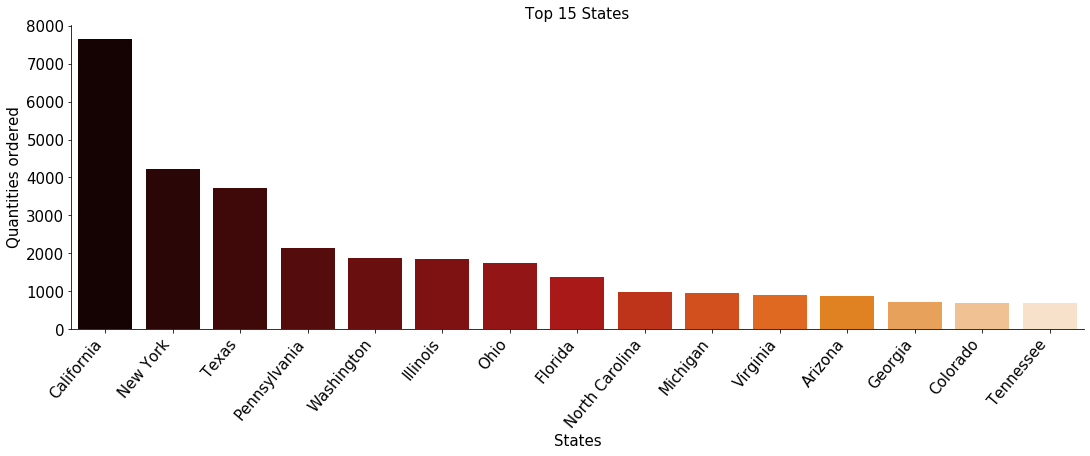

In [35]:
# To be more precise, we can get top 15 states for the above graph as shown below
top_15 = df.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_15.head(15), kind = 'bar', palette = 'gist_heat', aspect = 3)
plt.title('Top 15 States', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15)

#### **Observations -**
We observe that the top selling states are California, New York, Texas

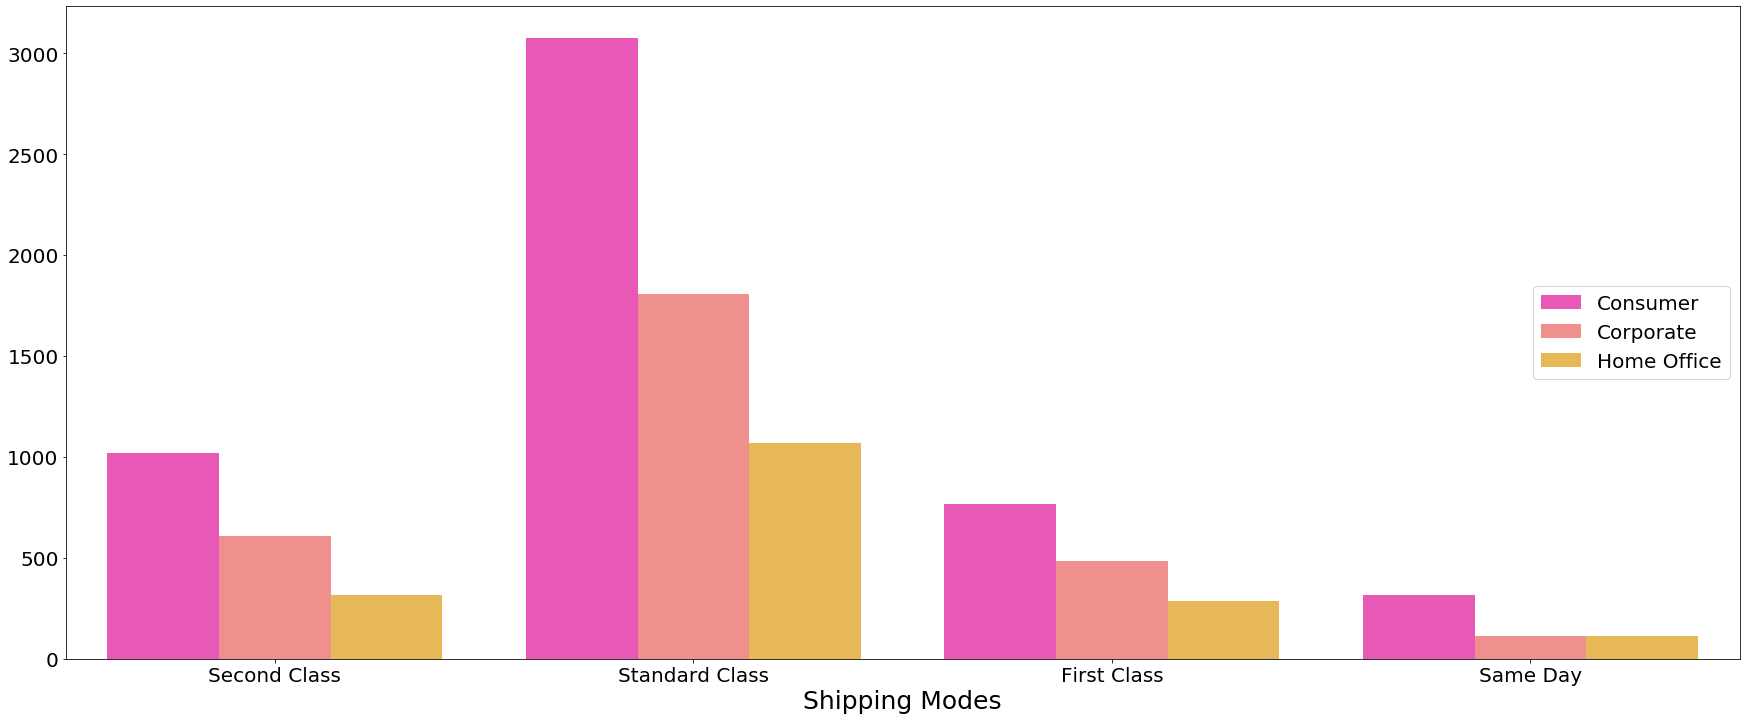

In [38]:
# We can also combine the graph  regarding shipping modes and Segments
plt.figure(figsize = (30,12))
sns.countplot(x = 'Ship Mode', hue = 'Segment', data = df, palette = 'spring')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Shipping Modes', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20)

#### **Observations -**
Here, we observe that the people prefer the standard class shipping mode and the items are mostly ordered by the consumer segment. 

### **This data can be visualized better using Pie-Charts -**

Text(0.5, 1.0, 'Quantities ordered by each region')

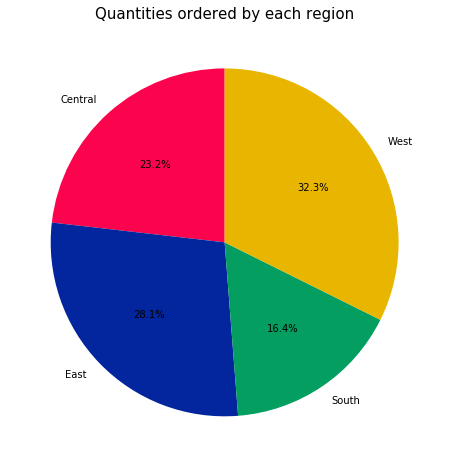

In [44]:
df_region = df.groupby('Region')['Quantity'].sum().reset_index()
plt.figure(figsize = (12,8))
plt.pie(df_region['Quantity'], labels = df_region['Region'].unique(), autopct='%1.1f%%', startangle=90,
        colors = ['#fc034e', '#03259e', '#039e60', '#e8b600'])
plt.title('Quantities ordered by each region', fontsize = 15)

#### **Observations -**
From the given pie-chart, we observe that most number of quantities ordered are from the West Region.

Text(0.5, 1.0, 'Average profit divided between different regions')

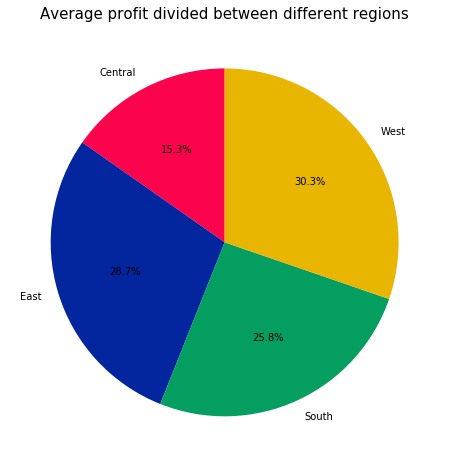

In [45]:
df_region = df.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize = (12,8))
plt.pie(df_region['Profit'], labels = df_region['Region'].unique(), autopct= '%.1f%%', startangle=90,
        colors = ['#fc034e', '#03259e', '#039e60', '#e8b600'])
plt.title('Average profit divided between different regions', fontsize = 15)

#### **Observations -**
The most number of profits are divided in the West Region.

Text(0.5, 1.0, 'Products sold according to category')

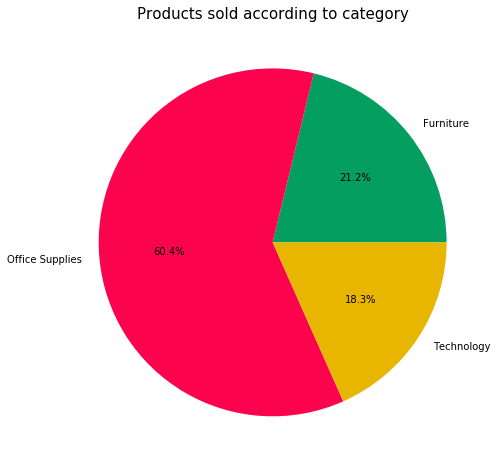

In [46]:
# Most Selling Categories
df_cat = df.groupby('Category')['Quantity'].sum().reset_index()
plt.figure(figsize = (12,8))
plt.pie(x = df_cat['Quantity'], labels = df_cat['Category'].unique(), autopct='%1.1f%%',
        colors = ['#039e60', '#fc034e', '#e8b600'])
plt.title('Products sold according to category', fontsize = 15)

#### **Observations -** 
We observe that the most number of sales are on the Office Supplies Category.

([<matplotlib.patches.Wedge at 0x19d2d6e0388>,
 [Text(0.976073756684635, 0.5072277806977297, 'Binders'),
  Text(0.2016538437473977, 1.081358278879808, 'Paper'),
  Text(-0.5698750957020162, 0.9408731983102814, 'Furnishings'),
  Text(-0.9927555531357746, 0.4737472023327234, 'Phones'),
  Text(-1.0943856106501602, -0.1109961044445972, 'Storage'),
  Text(-0.8966693479300548, -0.6371688006193416, 'Art'),
  Text(-0.4869899755703049, -0.9863269050847361, 'Accessories'),
  Text(-0.023032083622319597, -1.0997588477134497, 'Chairs'),
  Text(0.3454481080284471, -1.044349369061698, 'Appliances'),
  Text(0.6032749708252737, -0.9198148235246948, 'Labels'),
  Text(0.7854334460362346, -0.7701261596956992, 'Tables'),
  Text(0.9108832734856797, -0.6166779241095085, 'Envelopes'),
  Text(0.9936488204365672, -0.47187076794925403, 'Bookcases'),
  Text(1.0498137341525071, -0.32846784254287287, 'Fasteners'),
  Text(1.0831847727456425, -0.19160049084480674, 'Supplies'),
  Text(1.0965661256424153, -0.08684890381

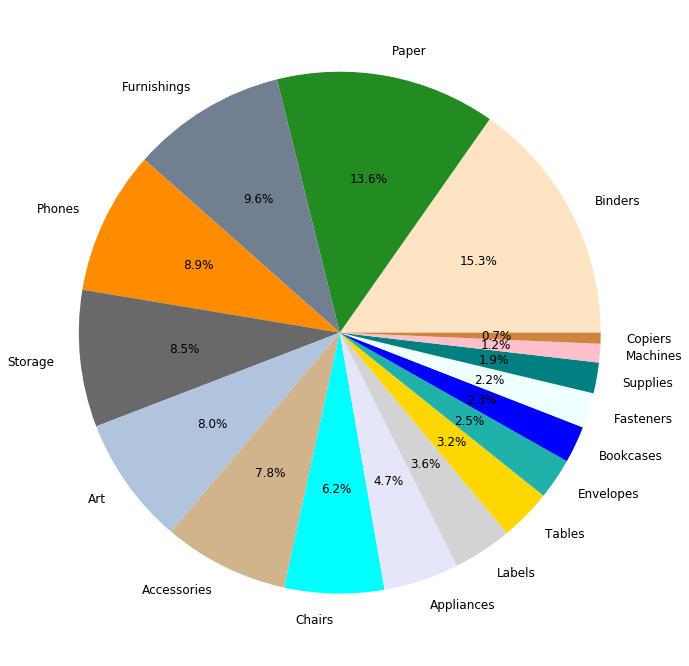

In [31]:
plt.figure(figsize = (13,12))
plt.pie(x = df['Sub-Category'].value_counts(), labels = df['Sub-Category'].value_counts().index,
        colors = ['bisque', 'forestgreen', 'slategrey', 'darkorange', 'dimgray', 'lightsteelblue', 'tan', 'cyan', 'lavender',
                  'lightgrey', 'gold', 'lightseagreen', 'blue', 'azure', 'teal', 'pink', 'peru'], autopct = '%1.1f%%',
        textprops = {'fontsize' : 12})

#### **Observations -**
We observe the different sub-categories ordered by their percentages of quantites. Here, we have added colors in each category to make it more visually appealing and the pie-chart more understandable.

### **Conclusion - From the above observations and visualizations from the given data set, the business owner understands the weak areas where he can work to gain more profits.**
### Some of the weak areas which can be improved on are -



Since the most profitable sub-category is the Copiers, the quantity of it should be more.


Since most of the shipping modes preferred are of Standard Class and the least preferred are Same Day & First Class modes, we can add more benefits in these categories like cashbacks, discounts, etc. so that people can prefer these least used shipping modes.


The least shipped area is the south region, it can be improved using marketing strategies like advertisements, benefits , discounts to attract customer attention and increase sales in that region.


These marketing stategies like benefits, discounts and public attention can also be used for increasing shippings in the Furniture and Technology categories.


### By applying these strategies, the profits of our company will increase for sure.